# Assignment 4

In [1]:
import ml_pipeline as pp
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image

## Load data

In [2]:
filename = './data/projects_2012_2013.csv'
df = pp.load_csv(filename)

## Process data for clustering

### Missing values

In [3]:
pp.na_col(df)

['school_ncesid',
 'school_metro',
 'school_district',
 'primary_focus_subject',
 'primary_focus_area',
 'secondary_focus_subject',
 'secondary_focus_area',
 'resource_type',
 'grade_level',
 'students_reached']

In [4]:
cat_col = ['school_metro',
 'school_district',
 'primary_focus_subject',
 'primary_focus_area',
 'secondary_focus_subject',
 'secondary_focus_area',
 'resource_type',
 'grade_level']
for c in cat_col:
    df_final = pp.na_fill_col(df, c, pp.most_freq)

In [5]:
df_final = pp.na_fill_col(df, 'students_reached', np.nanmean)

### Categorical variables to binary

In [6]:
df_final = pp.feat_binary(df, ['school_metro','school_charter','primary_focus_subject','primary_focus_area', 'grade_level', 'resource_type'])

### Normalization

In [7]:
num_col = ['total_price_including_optional_support', 'students_reached']

In [8]:
pp.normalize_mult_minmax(df_final, num_col)

MinMaxScaler(copy=True, feature_range=(0, 1))

### Given a k, generate k clusters using KMeans

In [9]:
cat_feat = ['school_metro_rural',
 'school_metro_suburban',
 'school_metro_urban',
 'school_charter_f',
 'school_charter_t',
 'primary_focus_subject_Applied Sciences',
 'primary_focus_subject_Character Education',
 'primary_focus_subject_Civics & Government',
 'primary_focus_subject_College & Career Prep',
 'primary_focus_subject_Community Service',
 'primary_focus_subject_ESL',
 'primary_focus_subject_Early Development',
 'primary_focus_subject_Economics',
 'primary_focus_subject_Environmental Science',
 'primary_focus_subject_Extracurricular',
 'primary_focus_subject_Foreign Languages',
 'primary_focus_subject_Gym & Fitness',
 'primary_focus_subject_Health & Life Science',
 'primary_focus_subject_Health & Wellness',
 'primary_focus_subject_History & Geography',
 'primary_focus_subject_Literacy',
 'primary_focus_subject_Literature & Writing',
 'primary_focus_subject_Mathematics',
 'primary_focus_subject_Music',
 'primary_focus_subject_Nutrition',
 'primary_focus_subject_Other',
 'primary_focus_subject_Parent Involvement',
 'primary_focus_subject_Performing Arts',
 'primary_focus_subject_Social Sciences',
 'primary_focus_subject_Special Needs',
 'primary_focus_subject_Sports',
 'primary_focus_subject_Visual Arts',
 'primary_focus_area_Applied Learning',
 'primary_focus_area_Health & Sports',
 'primary_focus_area_History & Civics',
 'primary_focus_area_Literacy & Language',
 'primary_focus_area_Math & Science',
 'primary_focus_area_Music & The Arts',
 'primary_focus_area_Special Needs',
 'grade_level_Grades 3-5',
 'grade_level_Grades 6-8',
 'grade_level_Grades 9-12',
 'grade_level_Grades PreK-2',
 'resource_type_Books',
 'resource_type_Other',
 'resource_type_Supplies',
 'resource_type_Technology',
 'resource_type_Trips',
 'resource_type_Visitors']
num_feat = ['total_price_including_optional_support', 'students_reached']
features = cat_feat + num_feat

In [10]:
df_final['cluster_prediction'] = pp.kmeans_label(KMeans(), {'n_clusters':2}, df_final[features])

## Summary statistics for each cluster

### Identify the number of data points in each cluster

In [11]:
pp.cluster_size(df_final, 'cluster_prediction')

cluster_prediction
0    68910
1    56066
Name: cluster_prediction, dtype: int64

### Summarize features in each cluster

In [12]:
pp.summarize_kmeans_features(df_final, 'cluster_prediction')

,cluster_prediction,0,1
school_ncesid,mean,241081190704.2421,249454408156.13455
school_latitude,mean,36.791287451385664,36.87152599192029
school_longitude,mean,-96.57768940621045,-94.97633523199447
total_price_including_optional_support,mean,0.003799340983568518,0.002955617560942986
students_reached,mean,0.009849677512182001,0.0052326978559264865
school_metro_rural,mean,0.11919895515890291,0.11035208504262833
school_metro_suburban,mean,0.2665070381657234,0.2625298755038704
school_metro_urban,mean,0.6142940066753737,0.6271180394535012
school_charter_f,mean,0.9086489624147439,0.9047372739271573
school_charter_t,mean,0.09135103758525613,0.09526272607284272


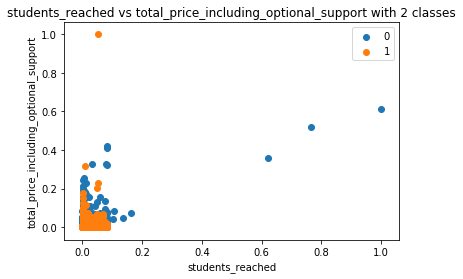

In [13]:
pp.plot_2d_cluster(df_final, 'cluster_prediction','students_reached', 'total_price_including_optional_support')

### Identify "distinctive" features of clusters

In [14]:
# rename columns so they can shown by export_graphviz
for c in df_final.columns:
    if '&' in c:
        new = c.replace(' & ', '')
        df_final = df_final.rename(columns = {c:new})
        features.remove(c)
        features.append(new)

In [15]:
# fit classifier
dt_1 = DecisionTreeClassifier(max_depth = 10)
dt_1.fit(df_final[features], df_final['cluster_prediction'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [16]:
# graph tree
pp.graph_tree(dt_1, features, 'tree.png')

### The most distinguishing features is primary focus area of Literacy & Language

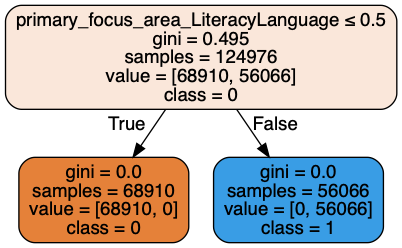

In [17]:
# show image
Image('tree.png')

# Further analysis

## Merge clusters into one

In [20]:
z=pp.merge_clusters(df_final, 'cluster_prediction', [0,1],1)

In [21]:
z['cluster_prediction'].unique()

array([1])

## Recluster with a new k

In [56]:
df_final['cluster_prediction'] = pp.kmeans_label(KMeans(), {'n_clusters':3}, df_final[features])

In [57]:
df_final['cluster_prediction'].unique()

array([0, 1, 2])

## Split a specific cluster into many (with a specific number of new clustering)

In [58]:
df_final = pp.split_cluster(df_final, 'cluster_prediction', features,2, {'n_clusters':3},[2,3,4])

In [59]:
df_final['cluster_prediction'].unique()

array([0., 1., 2., 3., 4.])